## 회귀
- 수치예측 
- 통계 관점에서의 회귀 
  + 해석이 매우 중요 / 데이터가 어떤 분포로 이루어져 있느냐!? 이걸 파악! 
  + 가설검정 추론
    - 카카오 주식 하락을 시키는 여러가지 요인
- 머신러닝 관점에서의 회귀
  + 수치 예측
  + 오차(Error) = 실제 관측치 - 예측치 
  + 좋은 모델을 선정 ==> 오차가 작은것이 Best

In [1]:
import numpy as np 

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) 

## 데이터 시각화

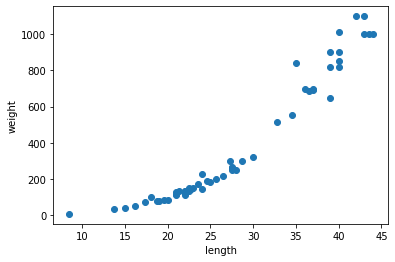

In [3]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.scatter(perch_length, perch_weight)
ax.set_xlabel("length")
ax.set_ylabel("weight")
plt.show()

## 세트분리
- 훈련 세트, 테스트 세트 분리
- scikit-learn, train_test_split() 

In [22]:
from sklearn.model_selection import train_test_split 

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42,), (14,), (42,), (14,))

In [17]:
train_input.ndim, test_input.ndim, train_target.ndim, test_target.ndim

(1, 1, 1, 1)

In [10]:
# 배열의 사이즈를 맘대로 바꿀 수 있음 
# 1차원 배열 --> 2차원 또는 3차원 배열
# 최대공약수 & 최소공배수 
test_array = np.array([1, 2, 3, 4, 5, 6, 7, 8])
temp_arr = test_array.reshape(-1, 2, 2)
temp_arr

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [23]:
train_input = train_input.reshape(-1, 1)
train_input.shape

(42, 1)

In [24]:
test_input = test_input.reshape(-1, 1)
test_input.shape

(14, 1)

In [15]:
train_input.ndim

2

## 모델 만들기

In [25]:
from sklearn.neighbors import KNeighborsRegressor 

knr = KNeighborsRegressor() 

# K-최근접 이웃 회귀모델
knr.fit(train_input, train_target)

KNeighborsRegressor()

## 결정계수
- 신뢰도, 모형을 내가 99.2% 

In [26]:
knr.score(test_input, test_target)

0.992809406101064

- 평가지표 (sklearn 함수로 존재함)
  + 절댓값 오차

In [28]:
from sklearn.metrics import mean_absolute_error 

# 테스트 세트에 대한 예측을 만듬
test_prediction = knr.predict(test_input)
test_prediction 

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [32]:
import pandas as pd 

result_df = pd.DataFrame({
    "예측" : test_prediction, 
    "기존" : test_target
})

result_df

,예측,기존
0,60.0,5.9
1,79.6,100.0
2,248.0,250.0
3,122.0,130.0
4,136.0,130.0
5,847.0,820.0
6,311.4,320.0
7,183.4,188.0
8,847.0,900.0
9,113.0,125.0


## 19g의 의미
- 예측이 평균적으로 19g 정도 다르다! 

In [30]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합
- 내신 (훈련) : 내신 1등
- 모의고사 (검증) : 모의고사 중간
- 수능 (테스트) : 모의고사보다 더 못봄

--- 
- 내신(훈련) : 내신 5등
- 모의고사 (검증) : 모의고사 상위 
- 수능 (테스트) : 수능 중상위

-- 
SI 업체 
- 과제 수행완료
--> 평가지표 몇 이상! 


과소적합 Case 
- 훈련 데이터 평가 : 0.97
- 테스트 데이터 평가 : 0.99

In [33]:
print(knr.score(train_input, train_target))

0.9698823289099254


## 파라미터 조정

In [34]:
knr.n_neighbors = 3 

# 모델 다시 훈련
knr.fit(train_input, train_target) 
print(knr.score(train_input, train_target))

0.9804899950518966


In [35]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 왜 다른 모형이 필요한가!? 
- 머신러닝 알고리즘의 종류는 수백가지

In [39]:
print(knr.predict([[50]]))

[1033.33333333]


In [40]:
print(knr.predict([[500]]))

[1033.33333333]


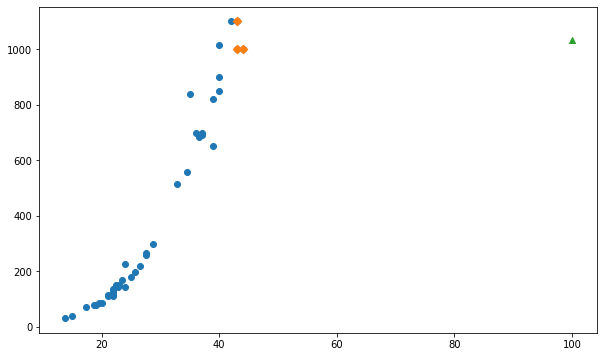

In [50]:
import matplotlib.pyplot as plt 

# 50cm  농어의 이웃을 구해보자!
distances, indexes = knr.kneighbors([[100]]) 

# 산점도를 그려본다
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
ax.scatter(100, 1033, marker='^')

plt.show()

## 선형회귀
- 직선을 긋는다! 
  + 주어진 데이터 분포에서 가장 적은 오차를 표현할 수 있는 직선을 긋는다. 

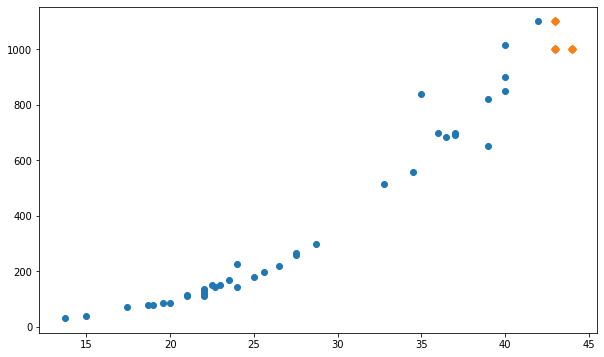

In [51]:
import matplotlib.pyplot as plt 

# 50cm  농어의 이웃을 구해보자!
distances, indexes = knr.kneighbors([[100]]) 

# 산점도를 그려본다
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.show()

주어진 데이터 분포에서 가장 적은 오차를 표현할 수 있는 직선을 긋는다.

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련한다. 
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


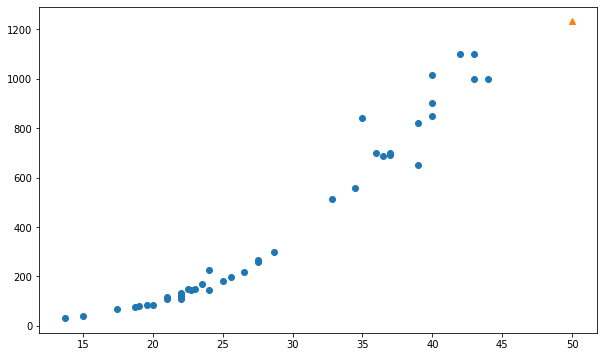

In [55]:
import matplotlib.pyplot as plt 

# 산점도를 그려본다
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(train_input, train_target)

# 50cm 농어 데이터
ax.scatter(50, 1231, marker='^')

plt.show()

- y = ax + b
  + a = 기울기
  + b = 상수

In [56]:
      # 기울기  # 상수
      # 계수    # 절편
      # 가중치
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


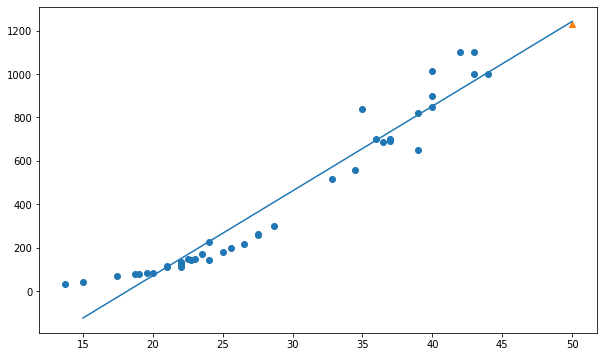

In [57]:
import matplotlib.pyplot as plt 

# 산점도를 그려본다
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(train_input, train_target)

# 50cm 농어 데이터
ax.scatter(50, 1231, marker='^')

# 기울기와 상수를 활용한 
                  # x * 기울기 + 상수
ax.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.show()